In [37]:
import pandas as pd
import seaborn as sns

# TODO: 15 pixels to mm is just a really rough initial estimate!
def normalize_df(df, pixel_to_mm=15):
    x0, y0 = df.iloc[0][['x', 'y']] 
    df['X displacement (mm)'] = - (df['x'] - x0) / pixel_to_mm
    df['Y displacement (mm)'] = - (df['y'] - y0) / pixel_to_mm
    
    df['X displacement smoothed (mm)'] = df['X displacement (mm)'].rolling(window=7, center=True).mean()
    df['Y displacement smoothed (mm)'] = df['Y displacement (mm)'].rolling(window=7, center=True).mean()
    
    df['X displacement smoothed (mm)'] = df['X displacement smoothed (mm)'].fillna(df['X displacement (mm)'])
    df['Y displacement smoothed (mm)'] = df['Y displacement smoothed (mm)'].fillna(df['Y displacement (mm)'])
    
    return df

<Axes: xlabel='minutes', ylabel='X displacement smoothed (mm)'>

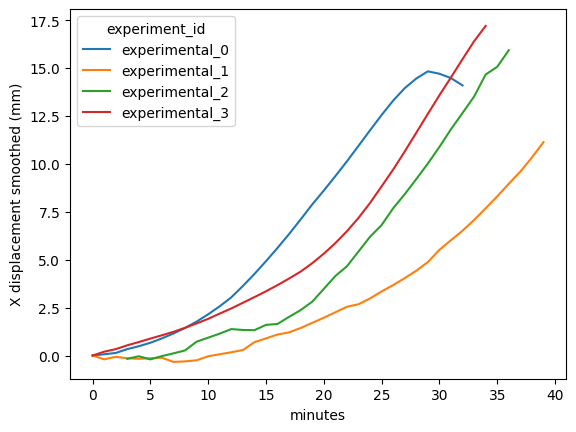

In [ ]:
# List of file paths for all datasets
file_paths = {
    "experimental_0": ("tracked_trajectories/bimorph_idx0_100x_tracked.csv", (0, 33)),
    "experimental_1": ("tracked_trajectories/bimorph_idx1_100x_tracked.csv", (0, None)),
    "experimental_2": ("tracked_trajectories/bimorph_idx2_100x_tracked.csv", (3, None)),
    "experimental_3": ("tracked_trajectories/bimorph_idx3_100x_tracked.csv", (0, None)),
    # "experimental_4": ("tracked_trajectories/bimorph_idx4_100x_tracked.csv", (0, None)),
    # "experimental_5": ("tracked_trajectories/bimorph_idx5_100x_tracked.csv", (0, None)),
    # 'control_0': ('tracked_trajectories/control_idx0_100x_tracked.csv', (0, 43)),
    # 'control_1': ('tracked_trajectories/control_idx1_100x_tracked.csv', (0, None)),
    # 'control_2': 'tracked_trajectories/control_idx2_100x_tracked.csv',
    # 'control_3': 'tracked_trajectories/control_idx3_100x_tracked.csv', (0, 35)), # window=3
    # 'control_4': 'tracked_trajectories/control_idx4_100x_tracked.csv',  # isues with this one!
    # 'control_5': ('tracked_trajectories/control_idx5_100x_tracked.csv',(0, 35)),
}

# Load and normalize each DataFrame, adding an experiment_id column
dfs = []
for name, (file, frames) in file_paths.items():
    df = normalize_df(pd.read_csv(file))  # Apply your normalize function
    df["experiment_id"] = name  # Label each dataset
    df = df[frames[0]:frames[1]]  
    dfs.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Plot with seaborn (different lines per experiment)
sns.lineplot(
    data=combined_df, x="minutes", y="X displacement smoothed (mm)", hue="experiment_id"
)

<Axes: xlabel='minutes', ylabel='X displacement (mm)'>

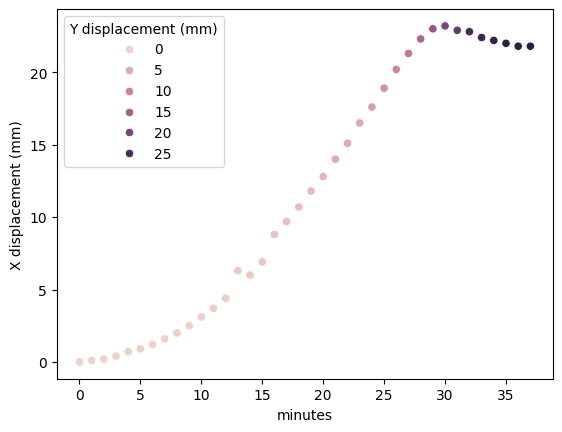

In [18]:
experimental_2_df = normalize_df(pd.read_csv('tracked_trajectories/bimorph_idx0_100x_tracked.csv'))
sns.scatterplot(experimental_2_df, x='minutes', y='X displacement (mm)', hue='Y displacement (mm)')

<Axes: xlabel='minutes', ylabel='X displacement (mm)'>

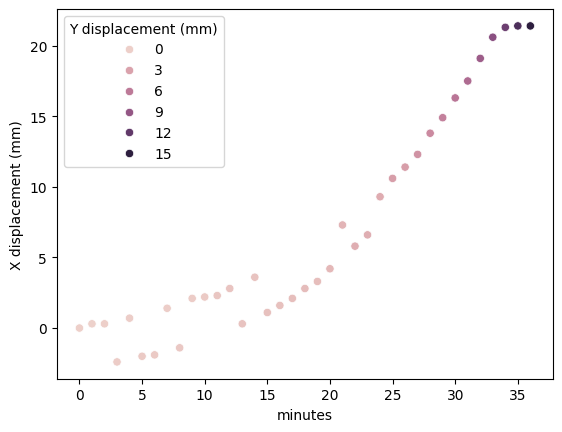

In [19]:
experimental_3_df = normalize_df(pd.read_csv('tracked_trajectories/bimorph_idx2_100x_tracked.csv'))
sns.scatterplot(experimental_3_df, x='minutes', y='X displacement (mm)', hue='Y displacement (mm)')